In [2]:
# ikmport libariries
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# creating a M x M grid with random spin configuration
def initialisation(M):   
    grid = np.random.choice([1, -1], size=(M, M))
    return grid

In [3]:
initialisation(1000)

array([[-1, -1,  1, ..., -1,  1,  1],
       [ 1,  1, -1, ..., -1, -1,  1],
       [ 1,  1, -1, ..., -1, -1,  1],
       ...,
       [-1, -1, -1, ..., -1,  1,  1],
       [-1,  1, -1, ..., -1, -1, -1],
       [ 1,  1, -1, ..., -1,  1, -1]])

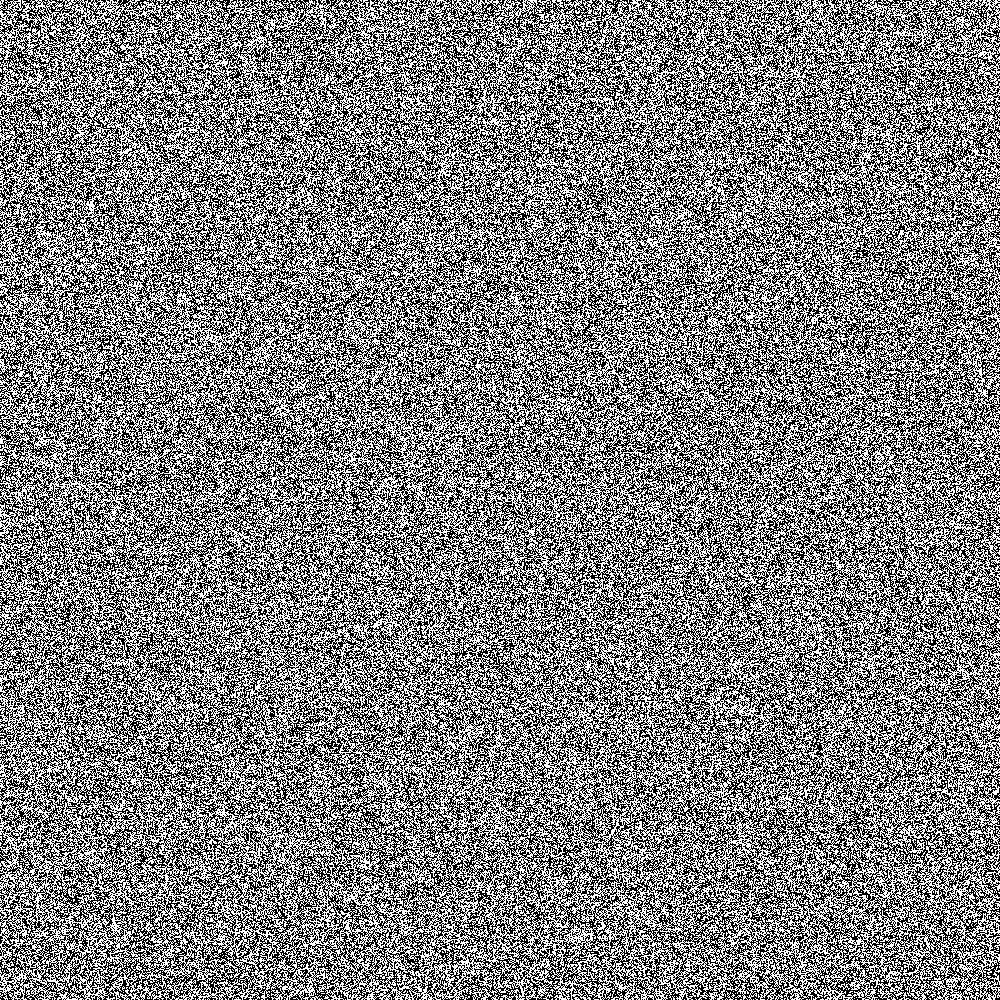

In [4]:
# to display the grid
from PIL import Image
def display_grid(grid):
    return Image.fromarray(np.uint8((grid + 1) * 0.5 * 255)) 

display_grid(initialisation(1000))

In [8]:
# Monte Carlo approach using Metropolis technique 
def monte_carlo_move(grid, beta = 2):
    for i in range(M):
        for j in range(M):
                a = np.random.randint(0, M)
                b = np.random.randint(0, M)
                s =  grid[a, b]  #spin
                nb = grid[(a+1)%M,b] + grid[a,(b+1)%M] + grid[(a-1)%M,b] + grid[a,(b-1)%M]
                ratio = 2*s*nb
                if ratio < 0:
                    s *= -1  # switch
                elif rand() < np.exp(-ratio*beta):
                    s *= -1  # switch anyway
                grid[a, b] = s
    return grid

In [9]:
from ipywidgets import interact
# animation
def display_ising_model_simulation(images):
    def _show(frame=(0, len(images) - 1)):
        return display_grid(images[frame])
    return interact(_show)


In [12]:
M = 300
images = [initialisation(M)]
for i in range(50):
    images.append(monte_carlo_move(images[-1].copy()))
display_ising_model_simulation(images);

In [13]:
images = [initialisation(M)]
for i in range(150):
    images.append(monte_carlo_move(images[-1].copy()))
display_ising_model_simulation(images);

In [14]:
images = [initialisation(M)]
for i in range(500):
    images.append(monte_carlo_move(images[-1].copy()))
display_ising_model_simulation(images);